# Non-Linear Relationships

Using ensemble method

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [8]:
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
y = boston_data.target

In [6]:
#df = pd.read_csv('housing.data', delim_whitespace=True, header=None)
#df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
#              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

## Intro to Decision Trees

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
# non-linear feature
# review pair plots to observe that

X = df[['LSTAT']].values

In [18]:
# max dept = test (may lead to overfiting)
tree = DecisionTreeRegressor(max_depth=5)

In [19]:
tree.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [20]:
# sort to organize plot
sort_idx = X.flatten().argsort()

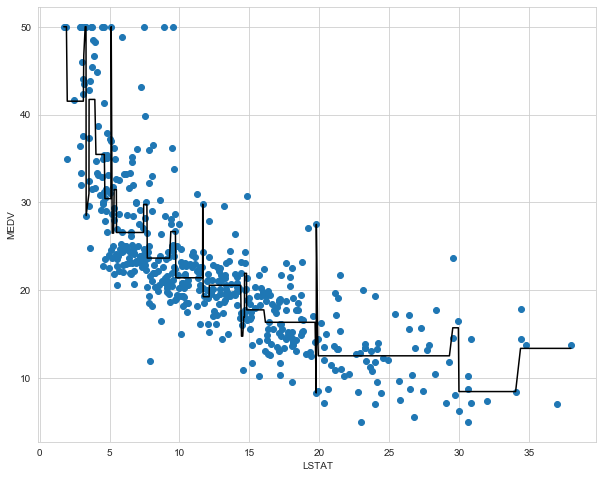

In [21]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
# plot DT on top of the scatter
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

***

Using `max_depth` of 5 led to overfitting. Let's try 2 instead.

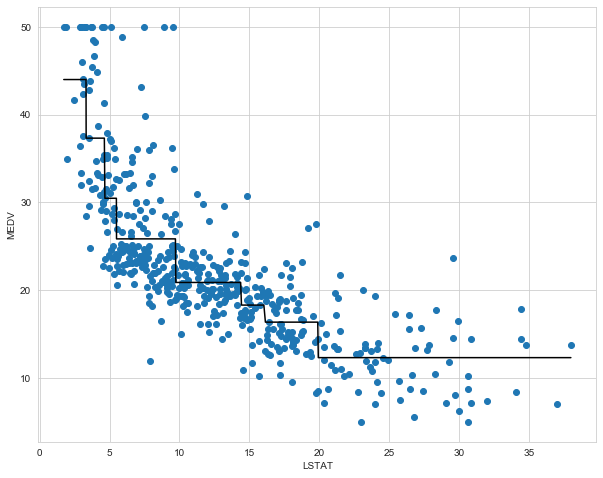

In [25]:
# Using DT needs a lot of testing to find the rigth parameters
# Alternatively, an ensemble method can be used

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

## Intro to Random Forest
- Emsemble method

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
# feed all features and let random forest decide

X = df.values
#y = df['MEDV'].values

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
forest = RandomForestRegressor(n_estimators=500, criterion='mse', 
                               random_state=42, n_jobs=-1)

In [57]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [58]:
y_train_pred = forest.predict(X_train)

In [59]:
y_test_pred = forest.predict(X_test)

In [60]:
# in-sample, ou-of-sample evaluation

print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 1.8700, test: 9.3921


In [61]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9787, test: 0.8740


## Intro to Ada Boost
- Emsemble method

In [45]:
from sklearn.ensemble import AdaBoostRegressor

In [46]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), 
                        n_estimators=500, random_state=42)

In [47]:
ada.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=4,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=500,
                  random_

In [48]:
y_train_pred = ada.predict(X_train)

In [49]:
y_test_pred = ada.predict(X_test)

In [50]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 4.6605, test: 13.4949


In [51]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.9470, test: 0.8189


To improve performance, tweaking the parameters is needed

## Revisiting Feature Importance

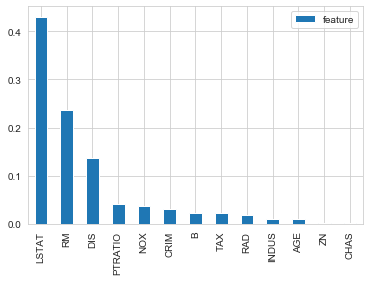

In [62]:
ada.feature_importances_

df.columns

result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']

result.sort_values(by='feature', ascending=False)

result.sort_values(by='feature', ascending=False).plot(kind='bar');

13 features.

Are they all equally important?

Which features are more important?

Can scikit-learn help us with this?

## According to AdaBoost


In [70]:
# extract relative importance
ada.feature_importances_

array([0.03104826, 0.00243815, 0.01083651, 0.00085548, 0.0371141 ,
       0.23589575, 0.00958776, 0.13743614, 0.01893706, 0.02188852,
       0.04185043, 0.02193283, 0.43017901])

In [71]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [72]:
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']

In [73]:
result.sort_values(by='feature', ascending=False)

,feature
LSTAT,0.430179
RM,0.235896
DIS,0.137436
PTRATIO,0.041850
NOX,0.037114
CRIM,0.031048
B,0.021933
TAX,0.021889
RAD,0.018937
INDUS,0.010837


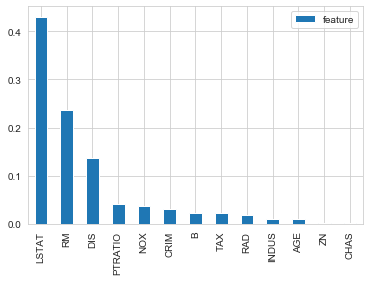

In [67]:
result.sort_values(by='feature', ascending=False).plot(kind='bar');

## According to Random Forest

In [68]:
forest.feature_importances_

array([0.03213849, 0.00166784, 0.00677542, 0.00131141, 0.01508521,
       0.4038535 , 0.01414013, 0.06280815, 0.00467201, 0.0120068 ,
       0.01833147, 0.0127986 , 0.41441098])

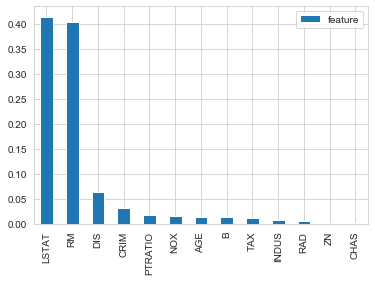

In [69]:
result = pd.DataFrame(forest.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');

### Exercise

In [75]:
# use DT with all of the X values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [79]:
# higher error rate thant ensemble methods

print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 15.3680, test: 16.9282


In [80]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.8252, test: 0.7728


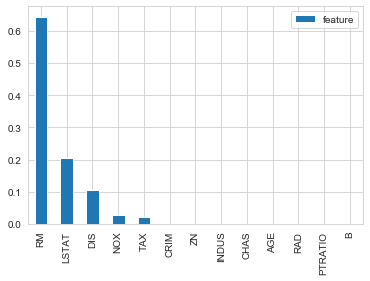

In [78]:
result = pd.DataFrame(tree.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False).plot(kind='bar');